# 1. DOWNLOAD THE DATASET

# 2 LOAD THE DATASET


In [46]:
import pandas as p
import seaborn as s
from scipy.sparse.construct import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ast import increment_lineno
%matplotlib inline
import matplotlib
from sklearn.linear_model import LinearRegression


In [47]:
out = p.read_csv('abalone.csv')
out.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

# 3. PERFORM BELOW VISUALIZATIONS

#### Univariate Analysis


<AxesSubplot:xlabel='Height', ylabel='Count'>

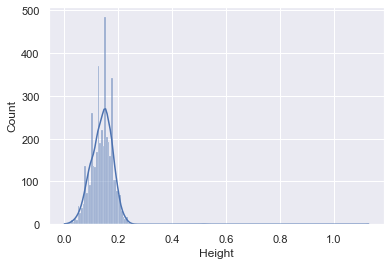

In [48]:
s.histplot(out.Height,kde=True)

<AxesSubplot:xlabel='Rings', ylabel='Count'>

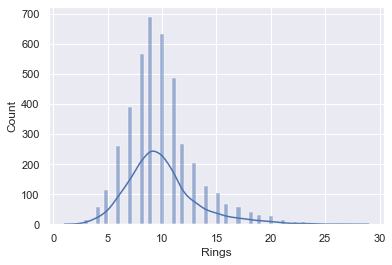

In [49]:
s.histplot(out.Rings,kde=True)

#### Bivariate analysis

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length', ylabel='Height'>

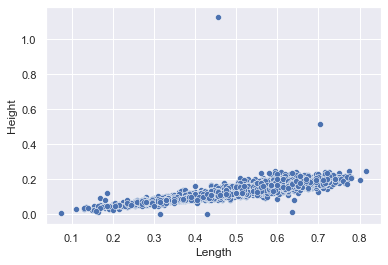

In [50]:
s.scatterplot(out.Length,out.Height)

# MULTIVARIATE ANALYSIS

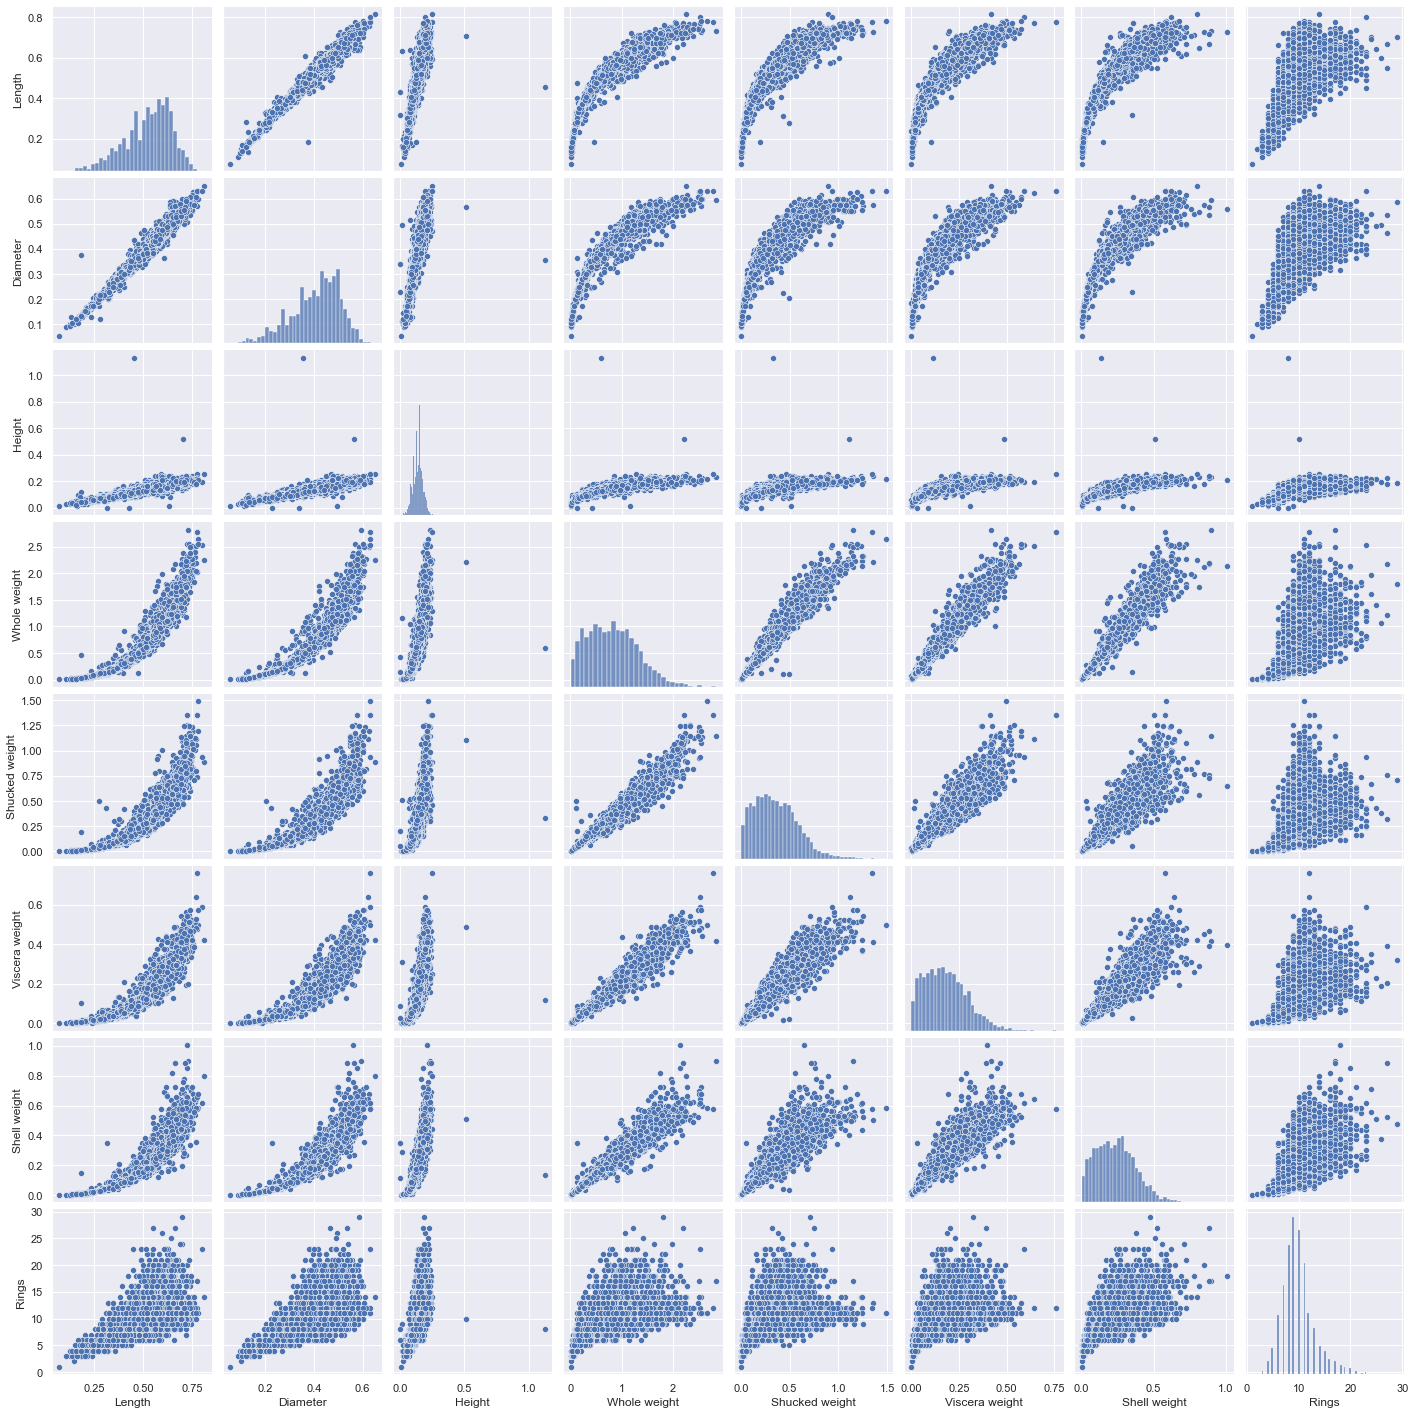

In [51]:
s.pairplot(out)

# 4. Perform descriptive statistics 


In [52]:
out.describe(include='all')

Sex       Length     Diameter       Height  Whole weight  \
count   4177  4177.000000  4177.000000  4177.000000   4177.000000   
unique     3          NaN          NaN          NaN           NaN   
top        M          NaN          NaN          NaN           NaN   
freq    1528          NaN          NaN          NaN           NaN   
mean     NaN     0.523992     0.407881     0.139516      0.828742   
std      NaN     0.120093     0.099240     0.041827      0.490389   
min      NaN     0.075000     0.055000     0.000000      0.002000   
25%      NaN     0.450000     0.350000     0.115000      0.441500   
50%      NaN     0.545000     0.425000     0.140000      0.799500   
75%      NaN     0.615000     0.480000     0.165000      1.153000   
max      NaN     0.815000     0.650000     1.130000      2.825500   

        Shucked weight  Viscera weight  Shell weight        Rings  
count      4177.000000     4177.000000   4177.000000  4177.000000  
unique             NaN             NaN           NaN          NaN  
top                NaN             NaN           NaN          NaN  
freq               NaN             NaN           NaN          NaN  
mean          0.359367        0.180594      0.238831     9.933684  
std           0.221963        0.109614      0.139203     3.224169  
min           0.001000        0.000500      0.001500     1.000000  
25%           0.186000        0.093500      0.130000     8.000000  
50%           0.336000        0.171000      0.234000     9.000000  
75%           0.502000        0.253000      0.329000    11.000000  
max           1.488000        0.760000      1.005000    29.000000

# 5. Check for Missing values

In [53]:
s.set(color_codes=True)
out.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

# 6. Find the outliers and replace the outliers

In [54]:
matplotlib.rcParams['figure.figsize']=(10,10)
out.sample(5)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
2534   M    0.64     0.585   0.195        1.6470          0.7225   
1123   F    0.55     0.415   0.135        0.8145          0.4270   
2267   F    0.61     0.480   0.175        1.0675          0.3910   
764    F    0.61     0.470   0.145        1.1530          0.4030   
3411   I    0.43     0.320   0.100        0.3855          0.1920   

      Viscera weight  Shell weight  Rings  
2534          0.3310         0.471     12  
1123          0.1855         0.175      8  
2267          0.2160         0.420     15  
764           0.2960         0.320     14  
3411          0.0745         0.100      7

# 7. Check for Categorical columns and perform encoding. 

In [55]:
out.columns
headers=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
out.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

# 8. Split the data into dependent and independent variables.

In [56]:
x = out.iloc[:,:-1].values
print(x)
y = out.iloc[:,-1]._values
print(y)

[['M' 0.455 0.365 ... 0.2245 0.101 0.15]
 ['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.296]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]
[15  7  9 ...  9 10 12]


# 9. Scale the independent variables

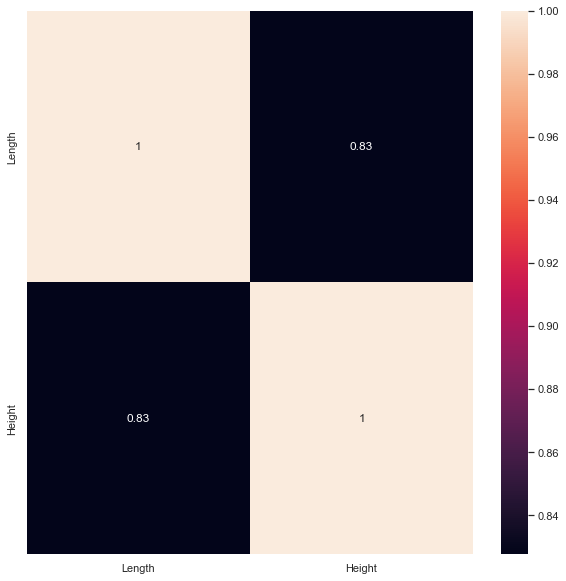

In [57]:
d = out[['Length','Height']]
s.heatmap(d.corr(), annot=True)
s.set(rc={'figure.figsize':(40,40)})

# 10. Split the data into training and testing

In [58]:

x= out.iloc[:, 1:2].values
y= out.iloc[:,2].values

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print('Row count of x_train table'+'-'+str(f"{len(x_train):,}"))
print('Row count of y_train table'+'-'+str(f"{len(y_train):,}"))
print('Row count of x_test table'+'-'+str(f"{len(x_test):,}"))
print('Row count of y_test table'+'-'+str(f"{len(y_test):,}"))

Row count of x_train table-3,341
Row count of y_train table-3,341
Row count of x_test table-836
Row count of y_test table-836


# 11. Build the Model

In [59]:
linear_model  =  LinearRegression()

# 12. Train the Model

In [60]:
linear_model.fit(x_train,y_train)

LinearRegression()

# 13. Test the Model 

In [61]:
pred = model.predict(x_test)
pred

array([0.42910815, 0.38837123, 0.48613984, 0.16024445, 0.50650831,
       0.510582  , 0.35985538, 0.37615015, 0.31097107, 0.48613984,
       0.36800276, 0.22134984, 0.31504476, 0.39244492, 0.16839184,
       0.45355031, 0.26616045, 0.44132923, 0.47799246, 0.35985538,
       0.29874999, 0.27838153, 0.35578169, 0.26208676, 0.43725554,
       0.43725554, 0.10728645, 0.49836092, 0.44540292, 0.41688707,
       0.29060261, 0.11136014, 0.457624  , 0.57983477, 0.33948692,
       0.4005923 , 0.36800276, 0.48206615, 0.33541323, 0.49836092,
       0.44132923, 0.38022384, 0.404666  , 0.41688707, 0.46984508,
       0.35985538, 0.47799246, 0.52687677, 0.41688707, 0.31911846,
       0.457624  , 0.30282369, 0.33541323, 0.46577138, 0.39244492,
       0.36392907, 0.1887603 , 0.25801307, 0.31504476, 0.28652892,
       0.48206615, 0.48613984, 0.457624  , 0.38022384, 0.31097107,
       0.510582  , 0.55131892, 0.50650831, 0.42096077, 0.53095046,
       0.40873969, 0.57576108, 0.49428723, 0.457624  , 0.46169

In [62]:
output = model.predict([[3]])
output

array([2.42521743])